# 0. 라이브러리 호출

In [1]:
#Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, make_scorer

# 1. DB 불러오기

In [2]:
#데이터프레임으로 데이터 읽어오기
ld_df = pd.read_csv("final_df.csv", index_col='EMAIL') #인덱스칼럼 EMAIL
#데이터 구조 표시
print(ld_df.shape)
ld_df.head()

(174, 330)


,min_activity_average_met,max_activity_average_met,mean_activity_average_met,median_activity_average_met,std_activity_average_met,min_activity_cal_active,max_activity_cal_active,mean_activity_cal_active,median_activity_cal_active,std_activity_cal_active,...,Q14_2,Q15,Q16_1,Q16_2,Q16_3,Q17,Q18,Q19,TOTAL,DIAG_NM
EMAIL,,,,,,,,,,,,,,,,,,,,,
nia+003@rowan.kr,1.09375,1.46875,1.262897,1.250000,0.094922,51,531,202.571429,174.0,119.271827,...,2,2,1,2,2,2,2,2,18,MCI
nia+005@rowan.kr,1.21875,1.53125,1.370299,1.375000,0.065236,106,377,217.477876,217.0,51.699112,...,2,2,2,2,2,2,2,2,28,CN
nia+010@rowan.kr,1.28125,1.68750,1.390625,1.390625,0.073000,123,515,259.672414,224.0,82.583164,...,2,2,1,2,2,2,2,2,28,MCI
nia+013@rowan.kr,1.18750,1.90625,1.478484,1.484375,0.154088,94,1121,493.147541,501.5,223.057100,...,2,2,2,2,2,2,2,2,30,MCI
nia+014@rowan.kr,1.25000,1.71875,1.442555,1.437500,0.100065,216,746,401.382353,380.5,123.279576,...,2,2,1,2,2,2,2,2,28,MCI


# 2. 데이터셋에 존재하는 클래스 비율 표시

Text(0.5, 0, '진단결과')

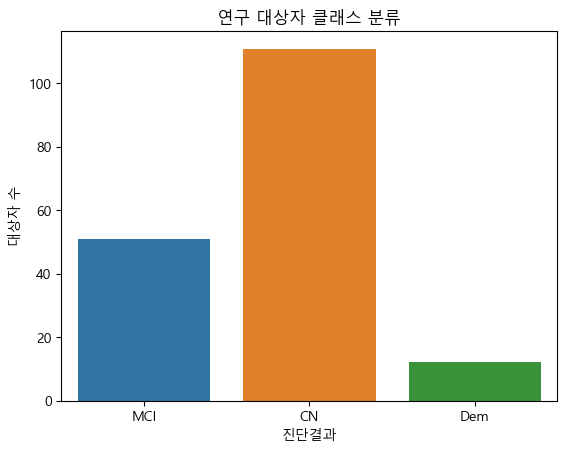

In [3]:
#한글 폰트
plt.rcParams['font.family'] = 'Malgun Gothic'

#데이터셋 선정
sns.countplot(x=ld_df['DIAG_NM'])
plt.title('연구 대상자 클래스 분류', fontsize=12)
plt.ylabel('대상자 수')
plt.xlabel('진단결과')

## 2-1. Dem 클래스 MCI클래스에 병합

Text(0.5, 1.0, '연구 대상자 클래스 분류')

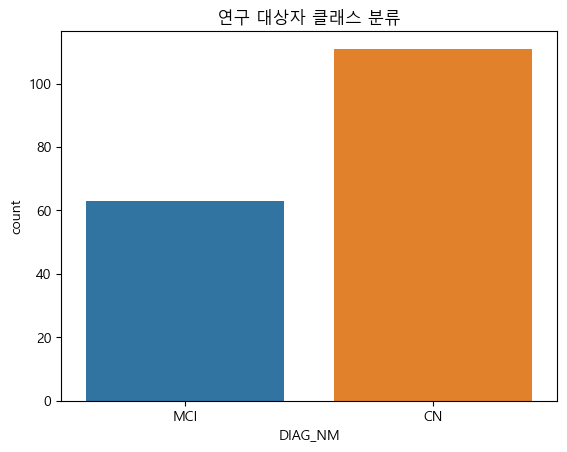

In [4]:
ld_df['DIAG_NM'].replace('Dem', 'MCI', inplace=True)

sns.countplot(x=ld_df['DIAG_NM'])
plt.title('연구 대상자 클래스 분류', fontsize=12)

# 3. 클래스별 비율 고려한 분할

In [5]:
#각 클래스의 비율을 고려해 무작위로 데이터셋 분할
#클래스는 2개이므로 1번 분할, 훈련/테스트 사이즈는 8:2, 무작의 시드값은 0
from sklearn.model_selection import StratifiedShuffleSplit


st_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)

# X값과 Y값 분리
X = ld_df.drop(columns=['DIAG_NM']).values
y = ld_df['DIAG_NM'].values

# 데이터 분할
for train_idx, test_idx in st_splitter.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

----------

# 5. 스케일링 결과 (실제로 X_train, y_train 에는 반영 안함)

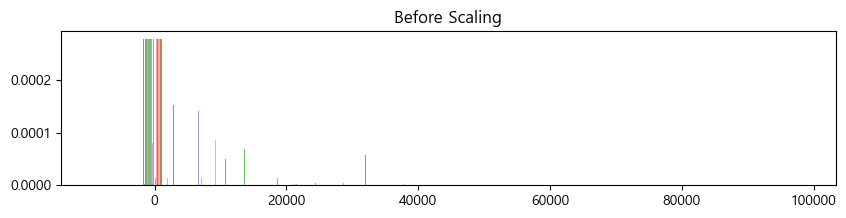

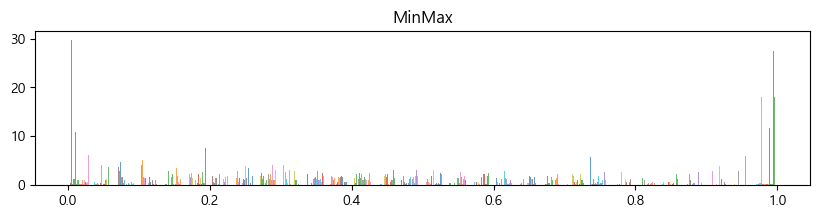

c:\Users\YunFrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


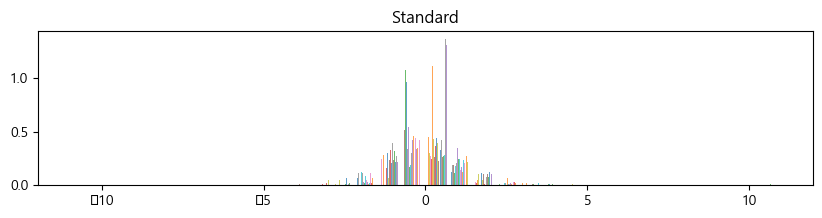

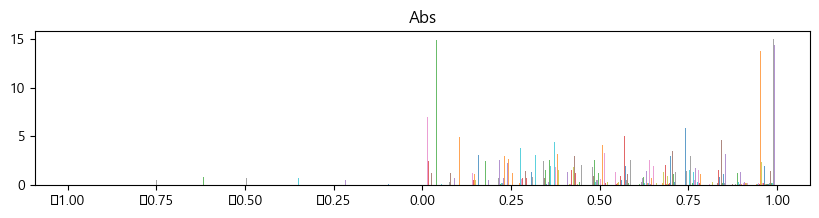

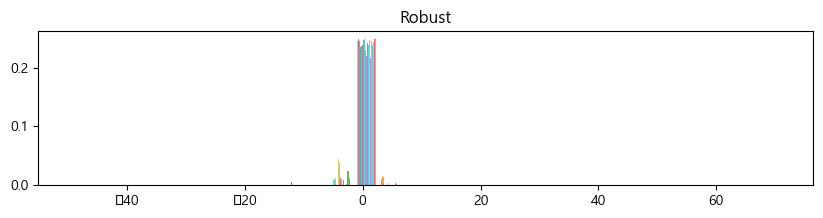

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
import matplotlib.pyplot as plt

#Scaler 객체 생성 딕셔너리 지정
scaler_list = {
    'mm': MinMaxScaler(),
    'std': StandardScaler(),
    'abs': MaxAbsScaler(),
    'rbs': RobustScaler()
}

#스케일링 함수 생성
def scale_data(X_train, scaler):
    X_train_scaled = scaler.fit_transform(X_train)
    return X_train_scaled

#스케일링 진행
scaled_data = {}
for scaler_name, scaler in scaler_list.items():
    #스케일링된 결과 변수에 저장
    X_train_scaled = scale_data(X_train, scaler)
    #리스트에 딕셔너리 형태로 저장
    scaled_data[scaler_name] = {
        'X_train': X_train_scaled
    }


#스케일 이전 상태 plot 로 표시
plt.figure(figsize=(10,2))
plt.hist(X_train, bins=30, alpha = 0.7, density = True)
plt.title('Before Scaling')
plt.show()

#Plot 로 스케일링 결과 표시
plt.figure(figsize=(10,2))
plt.hist(scaled_data['mm']['X_train'], bins=30, alpha = 0.7, density = True)
plt.title('MinMax')
plt.show()

plt.figure(figsize=(10,2))
plt.hist(scaled_data['std']['X_train'], bins=30, alpha = 0.7, density = True)
plt.title('Standard')
plt.show()

plt.figure(figsize=(10,2))
plt.hist(scaled_data['abs']['X_train'], bins=30, alpha = 0.7, density = True)
plt.title('Abs')
plt.show()

plt.figure(figsize=(10,2))
plt.hist(scaled_data['rbs']['X_train'], bins=30, alpha = 0.7, density = True)
plt.title('Robust')
plt.show()

----------------------

# 6. GridSearchCV 를 사용한 SVM 의 최적 하이퍼파라미터 탐색

In [7]:
#파라미터 내 모든 조합 최적의 파라미터 탐색
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, classification_report, roc_auc_score
#교차검증 API
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SMOTE


# C 제약조건의 강도
# gamma 근접 데이터에 대한 가중치

# Stratified K-Fold 생성
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
#SMOTE 생성
smote = SMOTE(sampling_strategy='auto', random_state=0)

#non-SMOTE 에 대한 그리드서치

def run_grid(X_train, y_train, scaler):

    ###수동
    if scaler != None:
        X_train_scaled = scaler().fit_transform(X_train)
        X_test_scaled = scaler().fit_transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    
    #파이프라인 생성
    # |          Train fold(SMOTE, Scaler)     | val fold(original) |     test data(나중에 평가 시 사용)     |

    pipeline = Pipeline([
        ('svm', SVC(probability=True, random_state=0))  # 분류 모델 (Random Forest 예시)
        ])

    #검색 범위 지정
    params ={
    'svm__kernel':['rbf','poly'],
    'svm__gamma':[0.00000001, 0.0000001, 0.00001, 0.0001, 0.01, 1, 10, 100],
    'svm__C':[0.01, 0.1, 1, 10, 1000, 10000]
    }
    
    #GridSearchCV 시작
    grid_cv = GridSearchCV(pipeline, param_grid=params, cv=kf, scoring='accuracy')
    grid_cv.fit(X_train_scaled, y_train)

    #교차검증 점수 계산
    print('[여기서부터 교차검증 에 대한 성능지표]')
    print('Best Hyper-Parameter : {}'.format(grid_cv.best_params_))
    print('Best Score(fold) : {:.4f}'.format(grid_cv.best_score_))

    #Test 데이터에 대한 점수 계산
    y_pred_prob =  grid_cv.best_estimator_.predict_proba(X_test_scaled)[:,1]
    y_pred =  grid_cv.best_estimator_.predict(X_test_scaled)

    #최적 모델 저장
    bestestimator = grid_cv.best_estimator_
    

    #Test 데이터에 대한 성능지표 계산
    print('[Test 데이터에 대한 성능지표]')
    #AUC 그래프
    fpr, tpr, thresholds = roc_curve((y_test == 'MCI').astype(int), y_pred_prob)
    #정확도
    print('정확도 : ', accuracy_score(y_test, y_pred))
    #정밀도
    print('정밀도 : ', precision_score(y_test, y_pred, average='macro'))
    #재현율
    print('재현율 : ',  recall_score(y_test, y_pred, average='macro'))
    #f1-score
    print('f1-score : ',  f1_score(y_test, y_pred, average='macro'))
    #AUC 측정
    print('AUC : ',  metrics.auc(fpr, tpr))

    return fpr, tpr, bestestimator


#SMOTE 에 대한 그리드서치

def run_grid_smote(X_train, y_train, scaler):

    ###수동
    if scaler != None:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.fit_transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
    
    #파이프라인 생성
    # |          Train fold(SMOTE, Scaler)     | val fold(original) |     test data(나중에 평가 시 사용)     |
    pipeline = Pipeline([
        ('svm', SVC(probability=True, random_state=0))  # SVC 모델
        ])

    #검색 범위 지정
    params ={
    'svm__kernel':['rbf','poly'],
    'svm__gamma':[0.00000001, 0.0000001, 0.00001, 0.0001, 0.01, 1, 10, 100],
    'svm__C':[0.01, 0.1, 1, 10, 1000, 10000]
    }

    #GridSearchCV 시작
    grid_cv = GridSearchCV(pipeline, param_grid=params, cv=kf, scoring='accuracy') 
    grid_cv.fit(X_train_scaled_smote, y_train_smote)

    #교차검증 점수 계산
    print('[여기서부터 교차검증 에 대한 성능지표]')
    print('Best Hyper-Parameter : {}'.format(grid_cv.best_params_))
    print('Best Score(fold) : {:.4f}'.format(grid_cv.best_score_)) 

    #Test 데이터에 대한 점수 계산
    y_pred_prob =  grid_cv.best_estimator_.predict_proba(X_test_scaled)[:,1]
    y_pred =  grid_cv.best_estimator_.predict(X_test_scaled)

    #최적 모델 저장
    bestestimator = grid_cv.best_estimator_

    #Test 데이터에 대한 성능지표 계산
    print('[Test 데이터에 대한 성능지표]')
    #AUC 그래프
    fpr, tpr, thresholds = roc_curve((y_test == 'MCI').astype(int), y_pred_prob)
    #정확도
    print('정확도 : ', accuracy_score(y_test, y_pred))
    #정밀도
    print('정밀도 : ', precision_score(y_test, y_pred, average='macro'))
    #재현율
    print('재현율 : ',  recall_score(y_test, y_pred, average='macro'))
    #f1-score
    print('f1-score : ',  f1_score(y_test, y_pred, average='macro'))
    #AUC 측정
    print('AUC : ',  metrics.auc(fpr, tpr))

    return fpr, tpr, bestestimator

NV_OS
[여기서부터 교차검증 에 대한 성능지표]
Best Hyper-Parameter : {'svm__C': 1, 'svm__gamma': 1e-08, 'svm__kernel': 'rbf'}
Best Score(fold) : 0.7789
[Test 데이터에 대한 성능지표]
정확도 :  0.660377358490566
정밀도 :  0.8269230769230769
재현율 :  0.5263157894736842
f1-score :  0.44534883720930235
AUC :  0.5108359133126935
MM_OS
[여기서부터 교차검증 에 대한 성능지표]
Best Hyper-Parameter : {'svm__C': 1000, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Best Score(fold) : 0.8247
[Test 데이터에 대한 성능지표]
정확도 :  0.7169811320754716
정밀도 :  0.7677304964539007
재현율 :  0.6168730650154799
f1-score :  0.6074074074074074
AUC :  0.6756965944272445
STD_OS
[여기서부터 교차검증 에 대한 성능지표]
Best Hyper-Parameter : {'svm__C': 1, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Best Score(fold) : 0.8439
[Test 데이터에 대한 성능지표]
정확도 :  0.6415094339622641
정밀도 :  0.32075471698113206
재현율 :  0.5
f1-score :  0.39080459770114945
AUC :  0.6578947368421053
ABS_OS


c:\Users\YunFrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[여기서부터 교차검증 에 대한 성능지표]
Best Hyper-Parameter : {'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Best Score(fold) : 0.8052
[Test 데이터에 대한 성능지표]
정확도 :  0.6415094339622641
정밀도 :  0.32075471698113206
재현율 :  0.5
f1-score :  0.39080459770114945
AUC :  0.4829721362229102
RBS_OS


c:\Users\YunFrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[여기서부터 교차검증 에 대한 성능지표]
Best Hyper-Parameter : {'svm__C': 10, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Best Score(fold) : 0.7598
[Test 데이터에 대한 성능지표]
정확도 :  0.6415094339622641
정밀도 :  0.5735294117647058
재현율 :  0.5116099071207431
f1-score :  0.43585434173669474
AUC :  0.6160990712074302


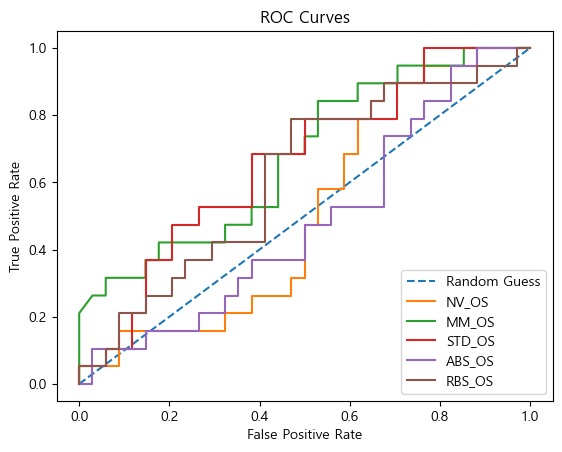

In [8]:
#그래프 설정
plt.plot([0,1],[0,1], '--', label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')


# # #NV_NM
# print("NV_NM")
# fpr, tpr, bestestimator = run_grid(X_train, y_train, None)
# plt.plot(fpr, tpr, '-', ms=2, label="NV_NM")

# # #MM_NM
# print("MM_NM")
# fpr, tpr, bestestimator = run_grid(X_train, y_train, MinMaxScaler())
# plt.plot(fpr, tpr, '-', ms=2, label="MM_NM") 

# # #STD_NM
# print("STD_NM")
# fpr, tpr, bestestimator = run_grid(X_train, y_train, StandardScaler())
# plt.plot(fpr, tpr, '-', ms=2, label="STD_NM")

# # #ABS_NM
# print("ABS_NM")
# fpr, tpr, bestestimator = run_grid(X_train, y_train, MaxAbsScaler())
# plt.plot(fpr, tpr, '-', ms=2, label="ABS_NM")

# # #RBS_NM
# print("RBS_NM")
# fpr, tpr, bestestimator = run_grid(X_train, y_train, RobustScaler())
# plt.plot(fpr, tpr, '-', ms=2, label="RBS_NM")



#NV_OS
print("NV_OS")
fpr, tpr, bestestimator = run_grid_smote(X_train, y_train, None)
plt.plot(fpr, tpr, '-', ms=2, label="NV_OS")


#MM_OS
print("MM_OS")
fpr, tpr, bestestimator = run_grid_smote(X_train, y_train, MinMaxScaler())
plt.plot(fpr, tpr, '-', ms=2, label="MM_OS")


#STD_OS
print("STD_OS")
fpr, tpr, bestestimator = run_grid_smote(X_train, y_train, StandardScaler())
plt.plot(fpr, tpr, '-', ms=2, label="STD_OS")


#ABS_OS
print("ABS_OS")
fpr, tpr, bestestimator = run_grid_smote(X_train, y_train, MaxAbsScaler())
plt.plot(fpr, tpr, '-', ms=2, label="ABS_OS")


#RBS_OS
print("RBS_OS")
fpr, tpr, bestestimator = run_grid_smote(X_train, y_train, RobustScaler())
plt.plot(fpr, tpr, '-', ms=2, label="RBS_OS")

#legend 표시
plt.legend(loc='lower right')

# 최종 모델 저장 및 실제 성능 평가

In [9]:
from sklearn.metrics import confusion_matrix

###수동
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)


X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

#최종 모델 생성
bestestimator = SVC(C=1000, gamma=0.01, kernel='rbf', probability=True, random_state=0)
bestestimator.fit(X_train_scaled_smote, y_train_smote)

#Classification report
y_pred = bestestimator.predict(X_test_scaled)
report = classification_report(y_test, y_pred, digits=3)
cm = confusion_matrix(y_test, y_pred)
print('오차행렬\n', cm)

#AUC 그래프
y_pred_prob =  bestestimator.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve((y_test == 'MCI').astype(int), y_pred_prob)
#정확도
print('정확도 : ', accuracy_score(y_test, y_pred))
#정밀도
print('정밀도 : ', precision_score(y_test, y_pred, average='macro'))
#재현율
print('재현율 : ',  recall_score(y_test, y_pred, average='macro'))
#f1-score
print('f1-score : ',  f1_score(y_test, y_pred, average='macro'))

print(report)

오차행렬
 [[33  1]
 [14  5]]
정확도 :  0.7169811320754716
정밀도 :  0.7677304964539007
재현율 :  0.6168730650154799
f1-score :  0.6074074074074074
              precision    recall  f1-score   support

          CN      0.702     0.971     0.815        34
         MCI      0.833     0.263     0.400        19

    accuracy                          0.717        53
   macro avg      0.768     0.617     0.607        53
weighted avg      0.749     0.717     0.666        53



# 최종 모델의 ROC커브와 리포트 생성

STD_NM


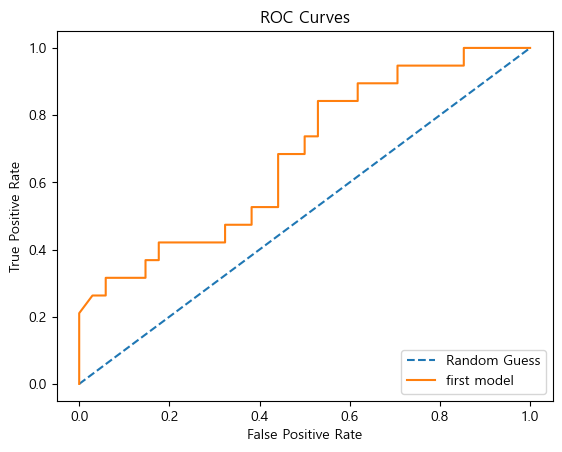

In [10]:
#그래프 설정
plt.plot([0,1],[0,1], '--', label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

#STD_NM 모델 하나만 ROC 그래프 그리기
print("STD_NM")
plt.plot(fpr, tpr, '-', ms=2, label="first model")
plt.legend(loc='lower right')

# SHAP VALUE 분석

-------------

In [11]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [12]:
#Kernel Explainer 사용해야 SVM 모델 사용가능
explainer = shap.KernelExplainer(model=bestestimator.predict_proba, data=X_train_scaled_smote)
shap_values = explainer.shap_values(X_train_scaled_smote)
print(shap_values)

Using 154 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/154 [00:00<?, ?it/s]

[array([[ 9.46964295e-05,  0.00000000e+00,  2.03480874e-03, ...,
        -2.47776064e-03,  4.09178968e-03, -3.50914875e-03],
       [ 0.00000000e+00,  0.00000000e+00,  4.72386619e-03, ...,
         0.00000000e+00, -1.93370438e-03,  2.00203045e-03],
       [-1.17673025e-03,  3.77803272e-03,  3.25728004e-03, ...,
         6.20698067e-04,  6.16399595e-04,  8.16802700e-03],
       ...,
       [ 2.71504991e-03,  0.00000000e+00, -2.72320149e-03, ...,
         0.00000000e+00, -3.58812665e-03,  4.67425316e-03],
       [-7.89924126e-03,  0.00000000e+00, -3.25268546e-03, ...,
         1.72776905e-03,  2.34532872e-03, -9.39068221e-03],
       [-5.08581286e-03,  6.54461153e-03,  0.00000000e+00, ...,
        -9.13269331e-04,  3.43012448e-03, -2.44953768e-02]]), array([[-9.46964295e-05,  0.00000000e+00, -2.03480874e-03, ...,
         2.47776064e-03, -4.09178968e-03,  3.50914875e-03],
       [ 0.00000000e+00,  0.00000000e+00, -4.72386619e-03, ...,
         0.00000000e+00,  1.93370438e-03, -2.00203045

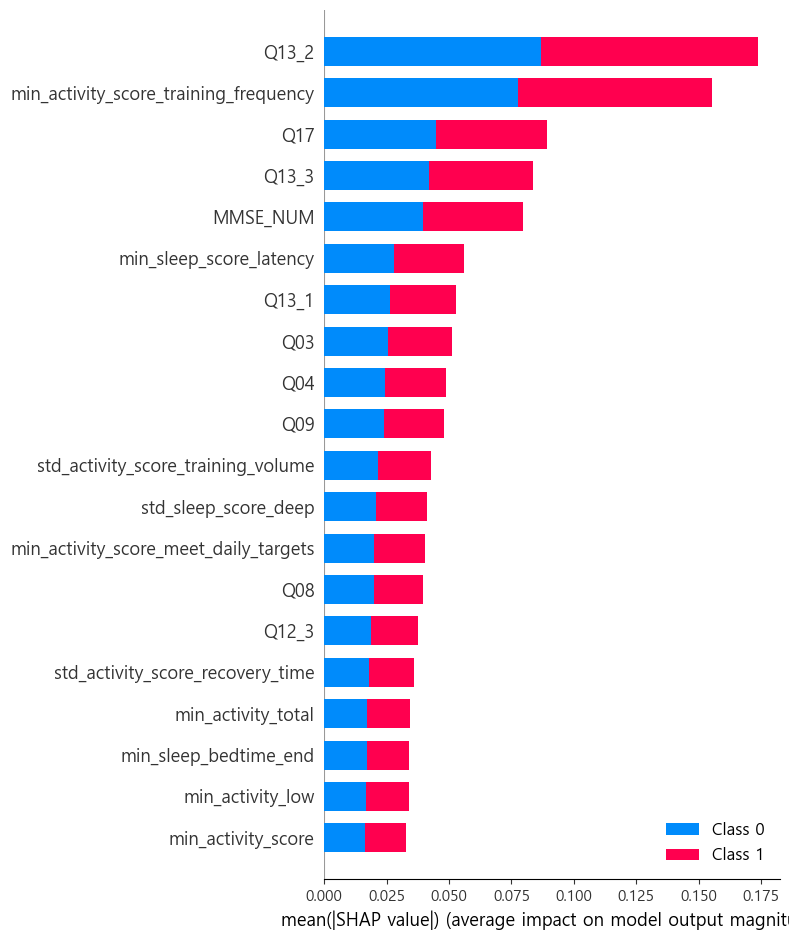

In [13]:
shap.summary_plot(shap_values, X_train_scaled_smote, feature_names=ld_df.columns, max_display=20)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Glyph 8722 (\N{MINUS SIGN}) missing from current font.


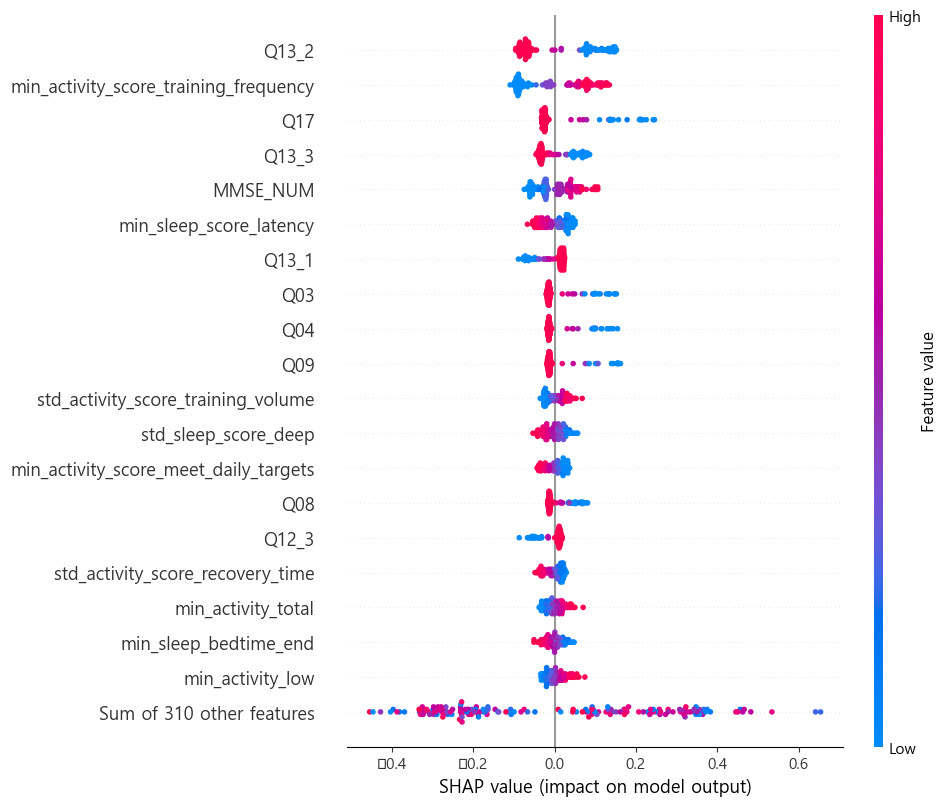

In [14]:
shap_explanation = shap.Explanation(values=shap_values[1], base_values=explainer.expected_value, data=X_train_scaled_smote, feature_names=ld_df.columns)
shap.plots.beeswarm(shap_explanation, max_display=20)

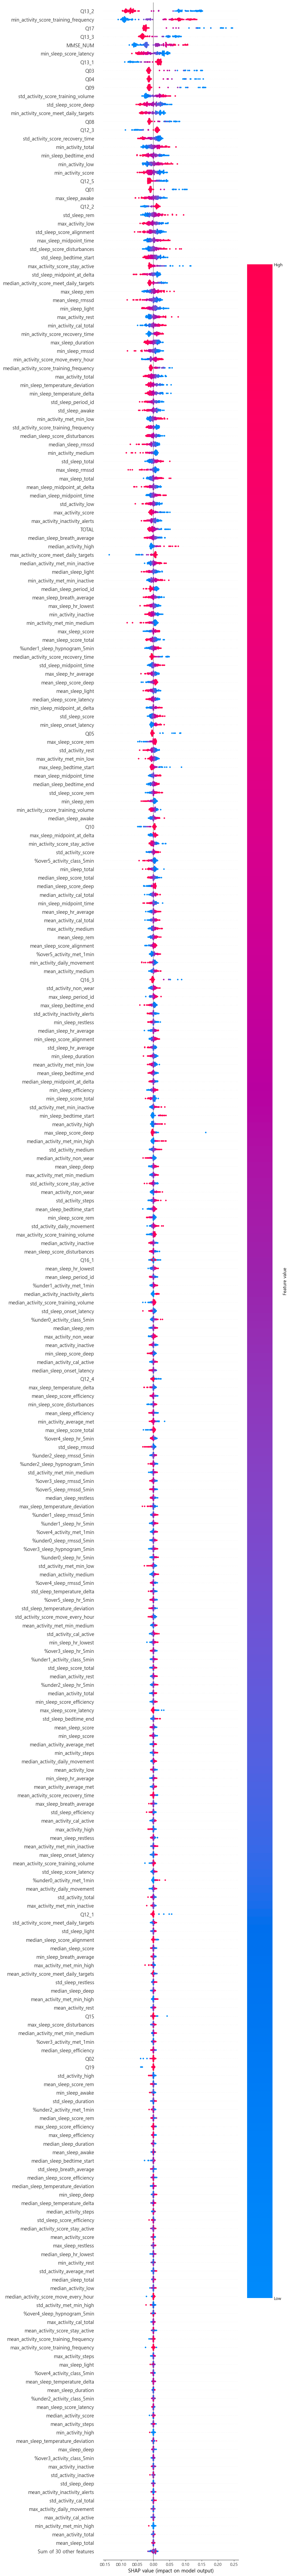

In [15]:
#전체 분석
shap.plots.beeswarm(shap_explanation, max_display=300)

---------

## 최종 모델의 변수중요도 상위 10개 변수(미완성, SVM은 변수중요도 X)

-------